In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [48]:
df=pd.read_csv('anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [50]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


# Data Preprocessing

In [51]:
# Feature Extraction
tfidf = TfidfVectorizer(stop_words='english')
df['genre'] = df['genre'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['genre'])

In [52]:
df['rating'] = df['rating'].fillna(df['rating'].mean())


In [53]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,25
episodes,0
rating,0
members,0


In [54]:
df.dtypes

,0
anime_id,int64
name,object
genre,object
type,object
episodes,object
rating,float64
members,int64


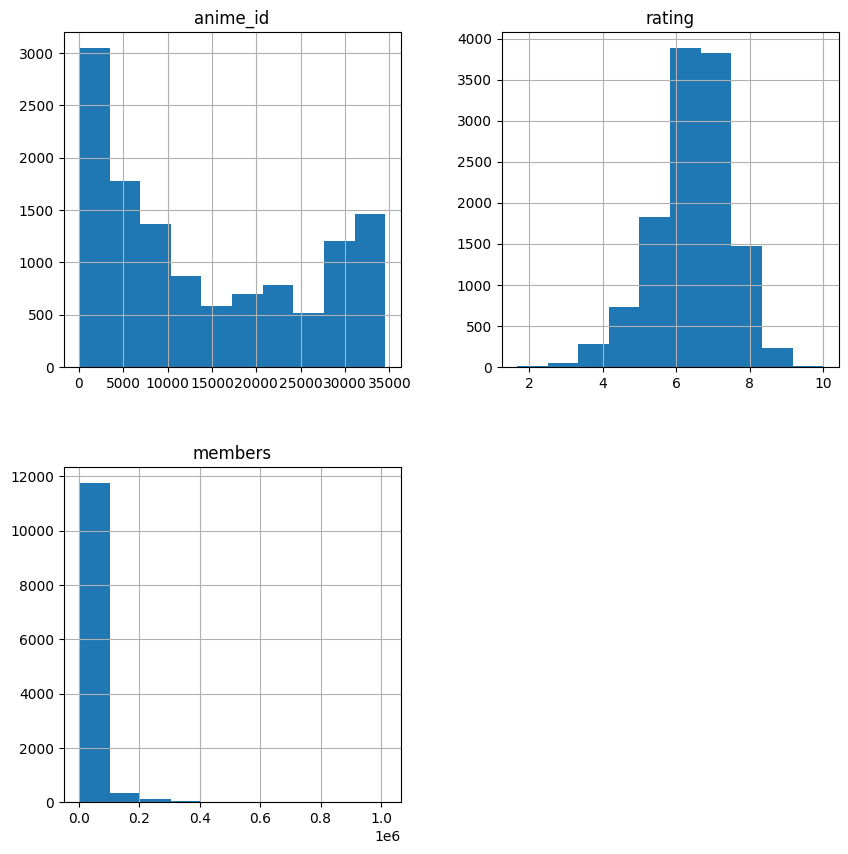

In [55]:
df.hist(figsize=(10,10))
plt.show()

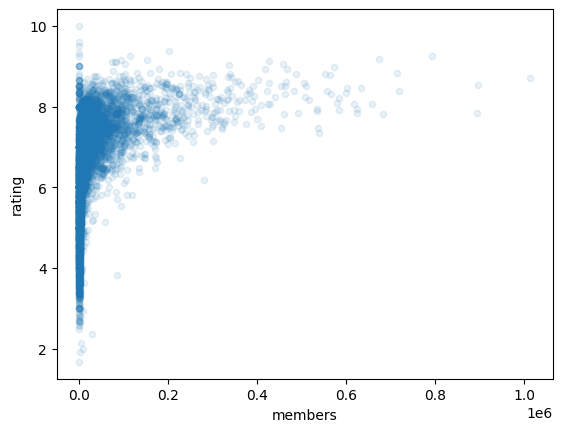

In [56]:
df.plot(kind='scatter', x='members', y='rating', alpha=0.1)
plt.show()

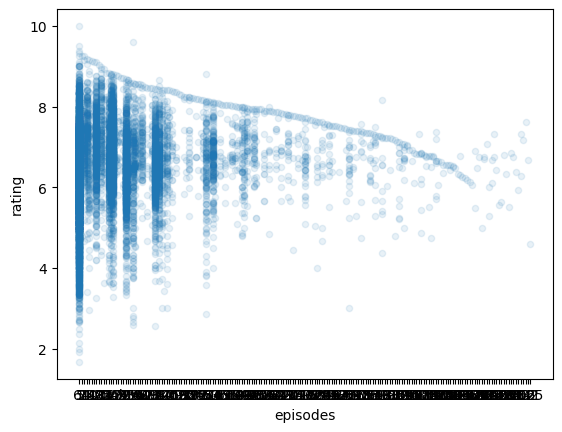

In [57]:
df.plot(kind='scatter', x='episodes', y='rating', alpha=0.1)
plt.show()

In [58]:
num_col=df.select_dtypes(include=np.number)
num_col

,anime_id,rating,members
0,32281,9.37,200630
1,5114,9.26,793665
2,28977,9.25,114262
3,9253,9.17,673572
4,9969,9.16,151266
...,...,...,...
12289,9316,4.15,211
12290,5543,4.28,183
12291,5621,4.88,219
12292,6133,4.98,175


In [59]:
cat_col=df.select_dtypes(exclude=np.number)
cat_col

,name,genre,type,episodes
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51
3,Steins;Gate,"Sci-Fi, Thriller",TV,24
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51
...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1
12290,Under World,Hentai,OVA,1
12291,Violence Gekiga David no Hoshi,Hentai,OVA,4
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1


In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col:
    cat_col[col]=le.fit_transform(df[col])
cat_col


,name,genre,type,episodes
0,5412,2687,0,0
1,2848,162,5,147
2,3346,535,5,132
3,10259,3241,5,84
4,3337,535,5,132
...,...,...,...,...
12289,11144,2904,3,0
12290,11418,2904,3,0
12291,11562,2904,3,118
12292,11563,2904,3,0


In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaler=pd.DataFrame(scaler.fit_transform(cat_col),columns=cat_col.columns)
df_scaler

,name,genre,type,episodes
0,-0.206866,0.798635,-1.676494,-0.824337
1,-0.929455,-1.920436,1.069565,1.814525
2,-0.789108,-1.518767,1.069565,1.545253
3,1.159120,1.395215,1.069565,0.683584
4,-0.791644,-1.518767,1.069565,1.545253
...,...,...,...,...
12289,1.408531,1.032313,-0.028859,-0.824337
12290,1.485750,1.032313,-0.028859,-0.824337
12291,1.526332,1.032313,-0.028859,1.293933
12292,1.526614,1.032313,-0.028859,-0.824337


In [62]:
corr_matrix=df_scaler.corr()
corr_matrix

,name,genre,type,episodes
name,1.000000,0.010528,0.012946,-0.000061
genre,0.010528,1.000000,-0.090968,-0.067065
type,0.012946,-0.090968,1.000000,0.464248
episodes,-0.000061,-0.067065,0.464248,1.000000


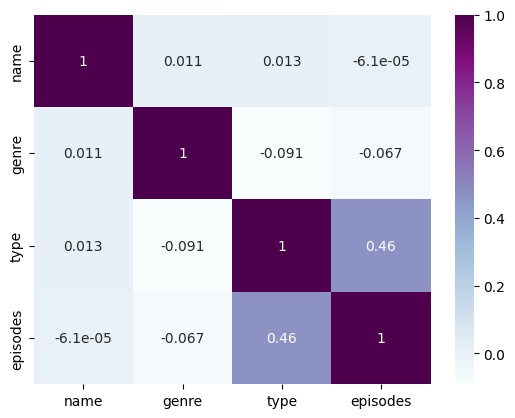

In [63]:
sns.heatmap(corr_matrix,annot=True,cmap='BuPu')
plt.show()

# Recommendation System

In [64]:
def get_recommendations(title, cosine_sim, df):
    idx = df[df['name'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    anime_indices = [i[0] for i in sim_scores]
    return df['name'].iloc[anime_indices]

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [65]:
print(get_recommendations('Kimi no Na wa.', cosine_sim, df))

5805              Wind: A Breath of Heart OVA
6394             Wind: A Breath of Heart (TV)
1111    Aura: Maryuuin Kouga Saigo no Tatakai
1201           Angel Beats!: Another Epilogue
1494                                 Harmonie
878             Shakugan no Shana II (Second)
986                         Shakugan no Shana
1604                      Shakugan no Shana S
1959                                Air Movie
4514                             Touka Gettan
Name: name, dtype: object


In [66]:
print(get_recommendations('Naruto', cosine_sim, df))

615                                    Naruto: Shippuuden
841                                                Naruto
1103    Boruto: Naruto the Movie - Naruto ga Hokage ni...
1343                                          Naruto x UT
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
1573    Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
2458                 Naruto Shippuuden: Sunny Side Battle
2997    Naruto Soyokazeden Movie: Naruto to Mashin to ...
7628                              Kyutai Panic Adventure!
784            Naruto: Shippuuden Movie 6 - Road to Ninja
Name: name, dtype: object


In [67]:
print(get_recommendations('One Piece', cosine_sim, df))

231     One Piece: Episode of Merry - Mou Hitori no Na...
241     One Piece: Episode of Nami - Koukaishi no Nami...
896     One Piece: Episode of Sabo - 3 Kyoudai no Kizu...
352                One Piece Film: Strong World Episode 0
753     One Piece: Episode of Luffy - Hand Island no B...
941                 One Piece Movie 4: Dead End no Bouken
1171    One Piece Movie 9: Episode of Chopper Plus - F...
1576                   One Piece: Adventure of Nebulandia
1793                 One Piece Movie 5: Norowareta Seiken
1795              One Piece: Umi no Heso no Daibouken-hen
Name: name, dtype: object


In [68]:
print(get_recommendations('Dragon Ball Z', cosine_sim, df))

515                                Dragon Ball Kai (2014)
588                                       Dragon Ball Kai
1409                Dragon Ball Z Movie 15: Fukkatsu no F
1930                                    Dragon Ball Super
3203               Dragon Ball Z: Summer Vacation Special
4275                 Dragon Ball Z: Atsumare! Gokuu World
4314    Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...
5999    Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...
1227                 Dragon Ball Z Movie 14: Kami to Kami
346                                           Dragon Ball
Name: name, dtype: object


# Evaluation

In [69]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [70]:
def evaluate_recommendation_system(df, test_df, cosine_sim, k=10):
    precision_list = []
    recall_list = []
    f1_list = []

    for index, row in test_df.iterrows():
        target_title = row['name']
        true_anime_set = set(df[df['name'] == target_title]['name'].values)
        recommended_anime = get_recommendations(target_title, cosine_sim, df)
        recommended_anime_set = set(recommended_anime)

        true_positive = len(true_anime_set.intersection(recommended_anime_set))
        false_positive = len(recommended_anime_set) - true_positive
        false_negative = len(true_anime_set) - true_positive

        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        # Indent these lines to be within the for loop
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1 = np.mean(f1_list)

    return avg_precision, avg_recall, avg_f1

In [71]:
precision, recall, f1 = evaluate_recommendation_system(df, test_df, cosine_sim)
print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")

Precision: 0.03647824318828792, Recall: 0.36478243188287923, F1-score: 0.06632407852415986


# Interview Questions
1. Can you explain the difference between user-based and item-based collaborative filtering?

*  User-based Collaborative Filtering: This approach recommends items based on the preferences of similar users. If two users have similar rating patterns, then items liked by one user will be recommended to the other.
*  Item-based Collaborative Filtering: This approach recommends items based on the similarity between items. It looks at the items the user has already liked and finds items that are similar to those, recommending them to the user.

2. What is collaborative filtering, and how does it work?

*  Collaborative Filtering: Collaborative filtering is a method used by recommendation systems to make predictions about a user's interests by collecting preferences from many users. It assumes that if a user A has the same opinion as user B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen user.
*  Collaborative filtering works by creating a matrix of users and items, with values representing the user's preference for an item. The system then looks for patterns and correlations within this matrix to make recommendations.